In [35]:
import numpy as np
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import tensorflow as tf

#### Load sample image 

In [45]:
datasest = load_sample_images()

In [13]:
print(dataset.DESCR)

Image: china.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/danielbuechele/
[3] http://www.flickr.com/photos/danielbuechele/6061409035/sizes/z/in/photostream/


Image: flower.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/vultilion/
[3] http://www.flickr.com/photos/vultilion/6056698931/sizes/z/in/photostream/






In [23]:
china = dataset.images[0]
flower = dataset.images[1]
print('[Shape] \n china img : {0} \n flower img : {1}'.format(china.shape, flower.shape))

[Shape] 
 china img : (427, 640, 3) 
 flower img : (427, 640, 3)


In [36]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(dataset.shape) 

(2, 427, 640, 3)


#### Make 2 filter
- horizontal
- vertical

In [37]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

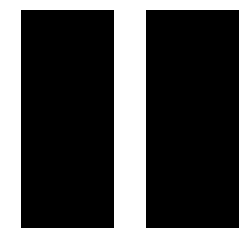

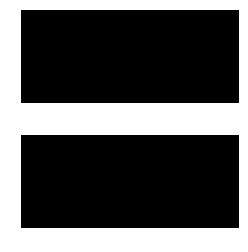

In [38]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical
filters[3, :, :, 1] = 1 # horizontal
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

#### input image data 와 filter를 적용한 합성곱층의 그래프 

In [39]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

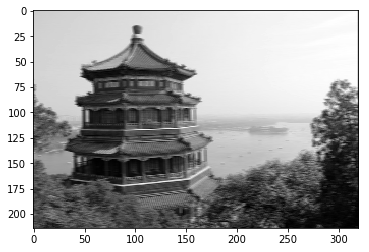

In [40]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
# Apply horizontal filter to china.jpg 
plt.imshow(output[0, :, :, 1], cmap='gray')
plt.show()

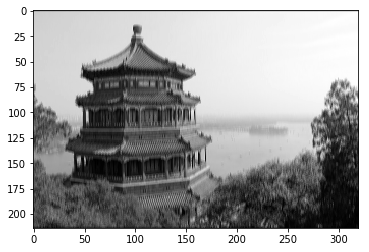

In [41]:
# Apply vertical filter to china.jpg 
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.show()

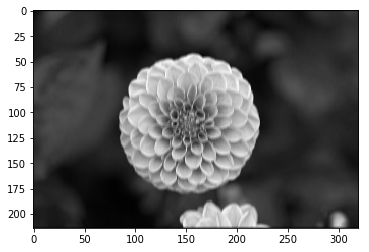

In [42]:
# Apply vertical filter to flower.jpg 
plt.imshow(output[1, :, :, 0], cmap='gray')
plt.show()

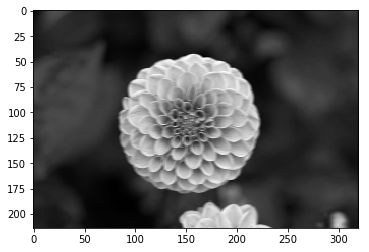

In [43]:
# Apply horizontal filter to flower.jpg 
plt.imshow(output[1, :, :, 1], cmap='gray')
plt.show()